##Predicting Stock Price with LSTM
- https://www.kaggle.com/darkknight91/ge-stock
- https://towardsdatascience.com/predicting-stock-price-with-lstm-13af86a74944
- Colab File Upload
  - http://www.dreamy.pe.kr/zbxe/CodeClip/3769485

In [0]:
!pip install tensorflow-gpu==2.0.0-alpha0 > /dev/null 2>&1

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [0]:
import numpy as np
print(np.__version__)
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

1.16.4


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

### 1. Loading the Dataset (Pandas)
- The data file "ge.us.txt" has approximately 55 years of stock price data for GE for US

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('*** Uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving ge.us.txt to ge.us.txt
*** Uploaded file "ge.us.txt" with length 691455 bytes


In [0]:
df_ge = pd.read_csv("ge.us.txt")
df_ge.head(10)

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579,0
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749,0
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010,0
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244,0
4,1962-01-08,0.5957,0.5957,0.5716,0.5957,3696430,0
5,1962-01-09,0.5957,0.6037,0.5878,0.5957,2778285,0
6,1962-01-10,0.5957,0.6037,0.5957,0.5957,2337096,0
7,1962-01-11,0.5957,0.5957,0.5878,0.5957,1943605,0
8,1962-01-12,0.5957,0.6037,0.5878,0.5878,2015151,0
9,1962-01-15,0.5957,0.5957,0.5957,0.5957,2527879,0


In [0]:
df_ge.tail(10)

,Date,Open,High,Low,Close,Volume,OpenInt
14048,2017-10-30,20.58,20.720,20.26,20.41,98376937,0
14049,2017-10-31,20.26,20.400,20.05,20.16,97991348,0
14050,2017-11-01,20.07,20.520,19.96,20.02,91707602,0
14051,2017-11-02,20.05,20.075,19.63,19.94,81528545,0
14052,2017-11-03,19.92,20.330,19.86,20.14,67855385,0
14053,2017-11-06,20.52,20.530,20.08,20.13,60641787,0
14054,2017-11-07,20.17,20.250,20.12,20.21,41622851,0
14055,2017-11-08,20.21,20.320,20.07,20.12,39672190,0
14056,2017-11-09,20.04,20.071,19.85,19.99,50831779,0
14057,2017-11-10,19.98,20.680,19.90,20.49,100698474,0


- checking if any null values are present

In [0]:
df_ge.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

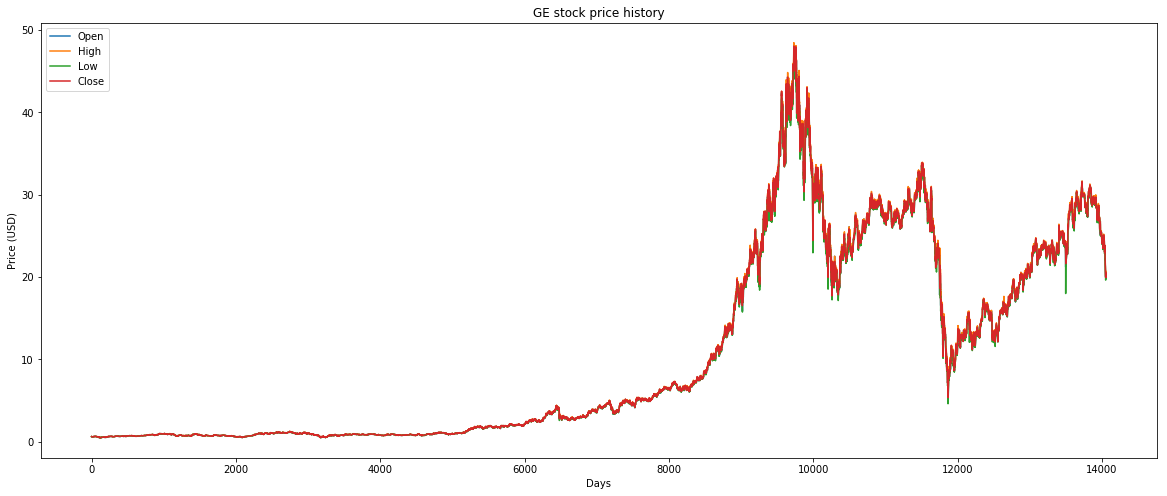

In [0]:
plt.figure(figsize=(20, 8))

plt.plot(df_ge["Open"])
plt.plot(df_ge["High"])
plt.plot(df_ge["Low"])
plt.plot(df_ge["Close"])
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

### 2. Normalizing the Data by Using SkLearn

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_cols = ["Open", "High", "Low", "Close", "Volume"]

df_train, df_test = train_test_split(df_ge, train_size=0.8, test_size=0.2, shuffle=False)

print("Train Size: {0}, Test Size: {1}".format(len(df_train), len(df_test)))

Train Size: 11246, Test Size: 2812


In [0]:
df_train.tail(5)

,Date,Open,High,Low,Close,Volume,OpenInt
11241,2006-09-06,27.269,27.412,27.254,27.334,23169386,0
11242,2006-09-07,27.254,27.495,27.237,27.405,36934990,0
11243,2006-09-08,27.292,27.412,27.277,27.382,17784600,0
11244,2006-09-11,27.254,27.718,27.180,27.718,26709564,0
11245,2006-09-12,27.718,27.963,27.680,27.912,27934131,0


In [0]:
df_test.head(5)

,Date,Open,High,Low,Close,Volume,OpenInt
11246,2006-09-13,27.935,28.049,27.769,28.049,33326250,0
11247,2006-09-14,27.814,28.066,27.776,28.003,25448731,0
11248,2006-09-15,28.099,28.178,27.953,28.058,41464854,0
11249,2006-09-18,27.896,28.146,27.867,28.073,28423137,0
11250,2006-09-19,28.066,28.066,27.858,28.058,23181436,0


- scale the feature by using MinMaxScaler


In [0]:
x_train_raw = df_train.loc[:, train_cols].values
min_max_scaler = MinMaxScaler()
x_train_raw = min_max_scaler.fit_transform(x_train_raw)

x_test_raw = df_test.loc[:, train_cols].values
x_test_raw = min_max_scaler.transform(x_test_raw)

In [0]:
x_train_raw[0:10]

array([[0.0036, 0.0035, 0.0036, 0.0034, 0.0211],
       [0.0034, 0.0032, 0.0034, 0.0034, 0.0137],
       [0.0034, 0.0032, 0.0032, 0.0032, 0.0176],
       [0.0032, 0.003 , 0.0027, 0.0029, 0.0273],
       [0.0029, 0.0027, 0.0026, 0.0029, 0.0314],
       [0.0029, 0.0029, 0.0029, 0.0029, 0.0229],
       [0.0029, 0.0029, 0.0031, 0.0029, 0.0189],
       [0.0029, 0.0027, 0.0029, 0.0029, 0.0153],
       [0.0029, 0.0029, 0.0029, 0.0027, 0.0159],
       [0.0029, 0.0027, 0.0031, 0.0029, 0.0206]])

In [0]:
x_test_raw[0:10]

array([[0.581 , 0.5747, 0.5794, 0.5797, 0.3028],
       [0.5784, 0.5751, 0.5796, 0.5787, 0.2306],
       [0.5845, 0.5774, 0.5833, 0.5798, 0.3774],
       [0.5802, 0.5767, 0.5815, 0.5802, 0.2579],
       [0.5838, 0.5751, 0.5813, 0.5798, 0.2099],
       [0.5839, 0.5786, 0.5821, 0.5827, 0.2761],
       [0.5845, 0.5758, 0.5753, 0.5729, 0.2975],
       [0.5753, 0.569 , 0.5756, 0.5722, 0.1968],
       [0.5747, 0.5764, 0.5767, 0.5805, 0.2531],
       [0.5845, 0.5878, 0.5863, 0.5899, 0.4057]])

### 3. Converting Data to Time-series and Adapt Them to Supervised Learning Problem

![...](https://camo.githubusercontent.com/11571b09025b96b3c1ba14a00f3648792d4b1a75/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a6259334f344c5232497067717777465848446d5462412e706e67)

In [0]:
TIME_STEPS = 3

In [0]:
def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in range(dim_0):  
        x[i] = mat[i: TIME_STEPS + i]
        y[i] = mat[TIME_STEPS + i, y_col_index]

    return x, y

In [0]:
x_temp, y_temp = build_timeseries(mat=x_train_raw, y_col_index=3)
print(x_temp.shape, y_temp.shape)

(11243, 3, 5) (11243,)


In [0]:
l = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
l = l[:-3]
print(l)

[0, 1, 2, 3, 4, 5, 6]


In [0]:
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0] % batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [0]:
BATCH_SIZE = 20

x_train = trim_dataset(x_temp, BATCH_SIZE)
y_train = trim_dataset(y_temp, BATCH_SIZE)
print(x_train.shape, y_train.shape)

(11240, 3, 5) (11240,)


In [0]:
x_temp, y_temp = build_timeseries(mat=x_test_raw, y_col_index=3)

x_val, x_test = np.split(trim_dataset(x_temp, BATCH_SIZE), 2)
x_val = trim_dataset(x_val, BATCH_SIZE)
x_test = trim_dataset(x_test, BATCH_SIZE)

y_val, y_test = np.split(trim_dataset(y_temp, BATCH_SIZE), 2)
y_val = trim_dataset(y_val, BATCH_SIZE)
y_test = trim_dataset(y_test, BATCH_SIZE)

In [0]:
print("     TRAIN:", x_train.shape, y_train.shape)
print("VALIDATION:", x_val.shape, y_val.shape)
print("      TEST:", x_test.shape, y_test.shape)

     TRAIN: (11240, 3, 5) (11240,)
VALIDATION: (1400, 3, 5) (1400,)
      TEST: (1400, 3, 5) (1400,)


### 4. Creating model (tf20 + Keras)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras import optimizers

lstm_model = Sequential()
lstm_model.add(LSTM(
    units=100, 
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_train.shape[2]),
    stateful=True,
    kernel_initializer='glorot_normal',
    return_sequences=True,
    bias_initializer='zero'
))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(
    units=100, 
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_train.shape[2]),
    stateful=True,
    kernel_initializer='glorot_normal',
    bias_initializer='zero'
))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(
    units=25,
    kernel_initializer='glorot_normal',
    bias_initializer='zero',
    activation='relu'
))
lstm_model.add(Dense(
    units=1,
    kernel_initializer='glorot_normal',
    bias_initializer='zero',
    activation='sigmoid'
))

nesterov = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
lstm_model.compile(loss='mean_squared_error', optimizer=nesterov)

W0605 01:28:03.407005 140395341133696 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7fafb41efac8>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0605 01:28:03.510703 140395341133696 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7fafb418c588>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


In [0]:
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
unified_lstm_6 (UnifiedLSTM) (20, 3, 100)              42400     
_________________________________________________________________
dropout_5 (Dropout)          (20, 3, 100)              0         
_________________________________________________________________
unified_lstm_7 (UnifiedLSTM) (20, 100)                 80400     
_________________________________________________________________
dropout_6 (Dropout)          (20, 100)                 0         
_________________________________________________________________
dense_6 (Dense)              (20, 25)                  2525      
_________________________________________________________________
dense_7 (Dense)              (20, 1)                   26        
Total params: 125,351
Trainable params: 125,351
Non-trainable params: 0
________________________________________________

### 5. Training model (tf20 + Keras)

In [0]:
from tensorflow.keras.callbacks import Callback

class LossHistory(Callback):
    def __init__(self, lstm_model):
        self.lstm_model = lstm_model
        self.epoch = 0
        self.train_losses = []
        self.val_losses = []        

    def on_epoch_end(self, batch, logs={}):
        self.train_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        if self.epoch % 10 == 0:
            print("epoch: {0} - train loss: {1:8.6f} - val loss: {2:8.6f}".format(
                self.epoch, 
                logs.get('loss'),
                logs.get('val_loss'),                
            ))
        self.lstm_model.reset_states()
        self.epoch += 1

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

num_epochs = 500

history = LossHistory(lstm_model=lstm_model)  # 손실 이력 객체 생성
early_stopping = EarlyStopping(monitor='val_loss', patience=7)

lstm_model.fit(
    x=x_train, 
    y=y_train,
    epochs=num_epochs,
    verbose=0,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_data=(x_val, y_val), 
    callbacks=[history, early_stopping]
)

epoch: 0 - train loss: 0.022951 - val loss: 0.049821
epoch: 10 - train loss: 0.002882 - val loss: 0.026539
epoch: 20 - train loss: 0.002283 - val loss: 0.022391
epoch: 30 - train loss: 0.001761 - val loss: 0.020201
epoch: 40 - train loss: 0.001476 - val loss: 0.018580
epoch: 50 - train loss: 0.001230 - val loss: 0.018166
epoch: 60 - train loss: 0.001039 - val loss: 0.017341
epoch: 70 - train loss: 0.000901 - val loss: 0.016913
epoch: 80 - train loss: 0.000786 - val loss: 0.016230
epoch: 90 - train loss: 0.000723 - val loss: 0.015625
epoch: 100 - train loss: 0.000668 - val loss: 0.015217
epoch: 110 - train loss: 0.000638 - val loss: 0.015063


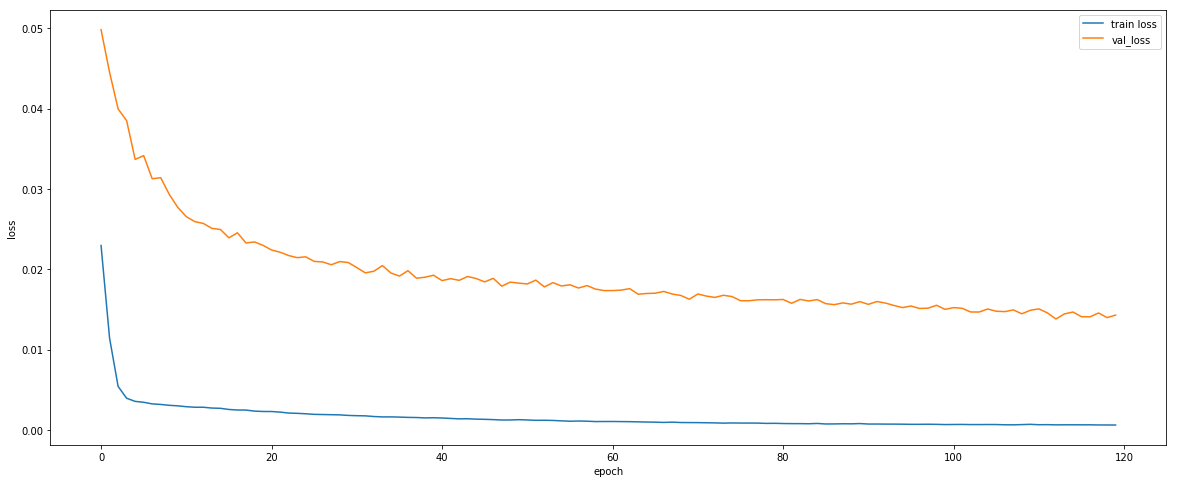

In [0]:
plt.figure(figsize=(20, 8))

plt.plot(history.train_losses)
plt.plot(history.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val_loss'], loc='upper right')
plt.show()

### 6. Prediction


In [0]:
pred = lstm_model.predict(x_test)
pred = np.squeeze(pred)

In [0]:
print(y_test.shape, pred.shape)

(1400,) (1400,)


In [0]:
y_test

array([0.3213, 0.3261, 0.3312, ..., 0.4383, 0.4271, 0.4192])

In [0]:
y_test_reverted = np.zeros(shape=(y_test.shape[0], 5))
print(y_test_reverted.shape)

y_test_reverted[:, 3] = y_test

y_test_reverted = min_max_scaler.inverse_transform(y_test_reverted)
print(y_test_reverted)

(1400, 5)
[[     0.459       0.4669      0.4511     15.754  274250.    ]
 [     0.459       0.4669      0.4511     15.979  274250.    ]
 [     0.459       0.4669      0.4511     16.224  274250.    ]
 ...
 [     0.459       0.4669      0.4511     21.32   274250.    ]
 [     0.459       0.4669      0.4511     20.79   274250.    ]
 [     0.459       0.4669      0.4511     20.41   274250.    ]]


In [0]:
pred_reverted = np.zeros(shape=(pred.shape[0], 5))
pred_reverted[:, 3] = pred

pred_reverted = min_max_scaler.inverse_transform(pred_reverted)
print(pred_reverted)

[[     0.459       0.4669      0.4511     12.2259 274250.    ]
 [     0.459       0.4669      0.4511     12.0373 274250.    ]
 [     0.459       0.4669      0.4511     11.9703 274250.    ]
 ...
 [     0.459       0.4669      0.4511     20.0578 274250.    ]
 [     0.459       0.4669      0.4511     20.3749 274250.    ]
 [     0.459       0.4669      0.4511     20.3777 274250.    ]]


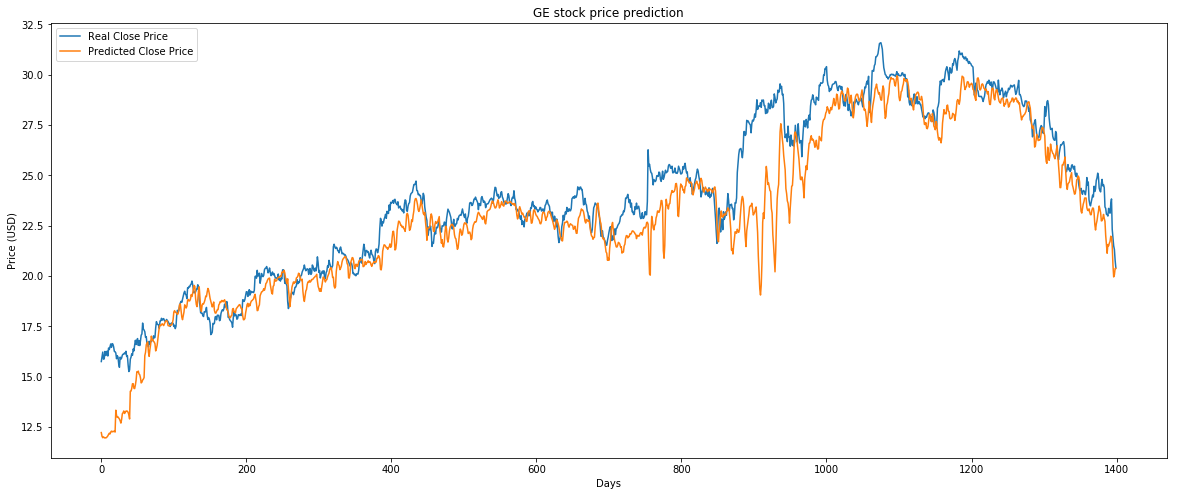

In [0]:
plt.figure(figsize=(20, 8))

plt.plot(y_test_reverted[:, 3])
plt.plot(pred_reverted[:, 3])
plt.title('GE stock price prediction')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Real Close Price','Predicted Close Price'], loc='upper left')
plt.show()

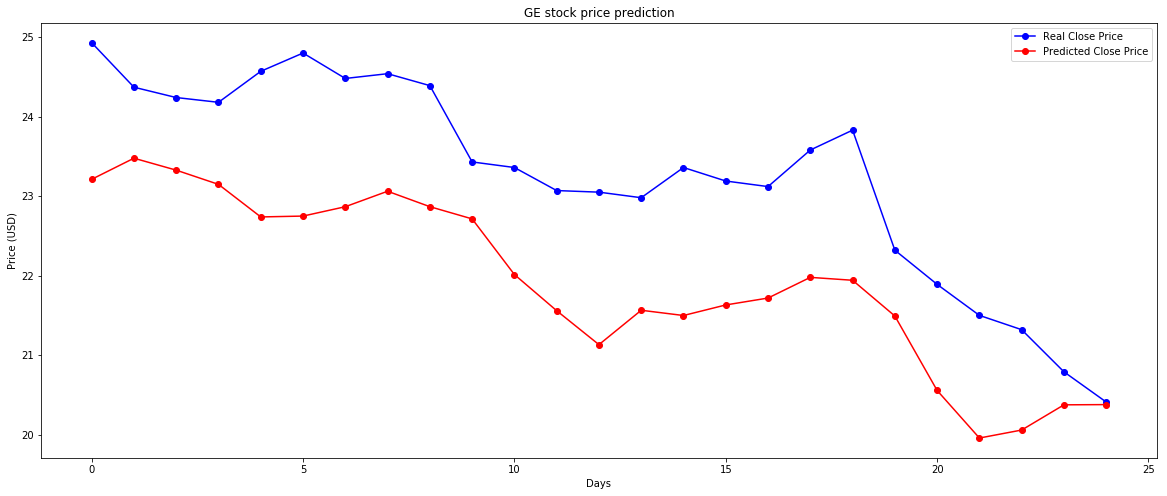

In [0]:
plt.figure(figsize=(20, 8))

plt.plot(y_test_reverted[:, 3][-25:], 'bo-')
plt.plot(pred_reverted[:, 3][-25:], 'ro-')
plt.title('GE stock price prediction')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Real Close Price','Predicted Close Price'], loc='upper right')
plt.show()